In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 22

### 0. Выбираем распределение - Бета распределение

In [63]:
# https://en.wikipedia.org/wiki/Beta_distribution
a = 1
b = 12

mean_theoretical = a/(a+b)
var_theoretical  = a*b/((a+b)**2 * (a+b+1))
print(f'Beta mean: {mean_theoretical}, variance: {var_theoretical}')

beta_rv = sts.beta(a=a, b=b)

Beta mean: 0.07692307692307693, variance: 0.00507185122569738


### 1. Генерируем выборку объёма 1000

In [64]:
sample = beta_rv.rvs(1000)
print(sample[:5])

[0.02943275 0.09457361 0.11593737 0.12346438 0.00097827]


### 2. Визуализация выборки и теоретического распределения

постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True)

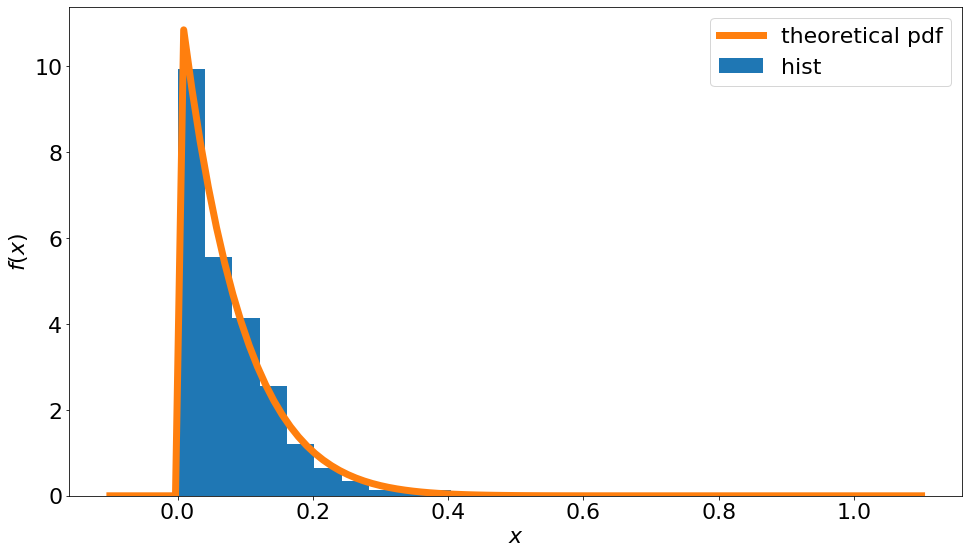

In [65]:
# для построения используем библиотеку Pandas:
# df = pd.DataFrame(sample, columns=['KDE'])
# ax = df.plot(kind='density')
plt.hist(sample,density=True)

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-0.1,1.1,100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf, label='', linewidth=7.)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.legend(labels=['theoretical pdf', 'hist'])

### 3. Оценка распределения выборочного среднего

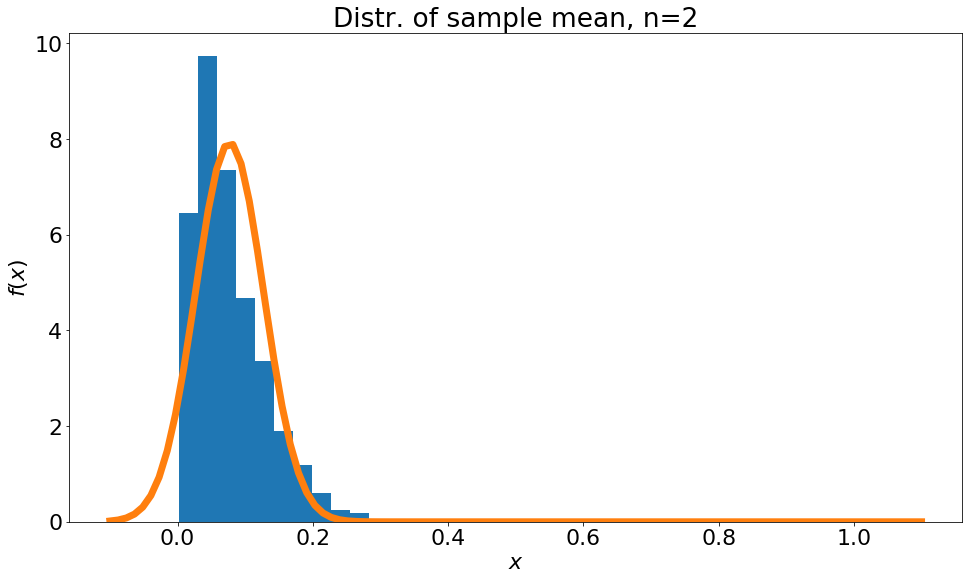

In [96]:
# Определим функцию, которая для заданного n:
# 1. сгенерирует 1000 выборок размера n
# 2. посчитает среднее
# 3. нарисует гистограмму выборочных средних
# 4. нарисует нормальное распределение, к которому стремиться распределение среднего согласно ЦПТ

def plot_sample_mean_distribution(n, ax=plt.gca()):
    sample_of_means = beta_rv.rvs(size=(1000,n)).mean(axis=1)

    M_mean = mean_theoretical
    M_std  = np.sqrt(var_theoretical/n)

    ax.hist(sample_of_means,density=True)

    x = np.linspace(-0.1,1.1,100)
    pdf = sts.norm.pdf(x, loc=M_mean, scale=M_std)
    ax.plot(x, pdf, label='', linewidth=7.)
    plt.title(f"Distr. of sample mean, n={n}")

    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    


plot_sample_mean_distribution(n=2)

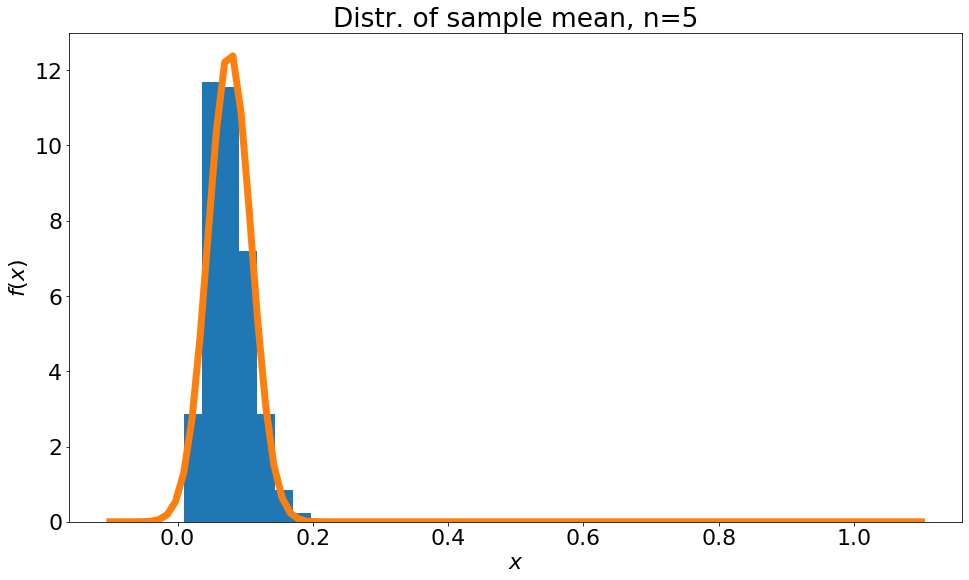

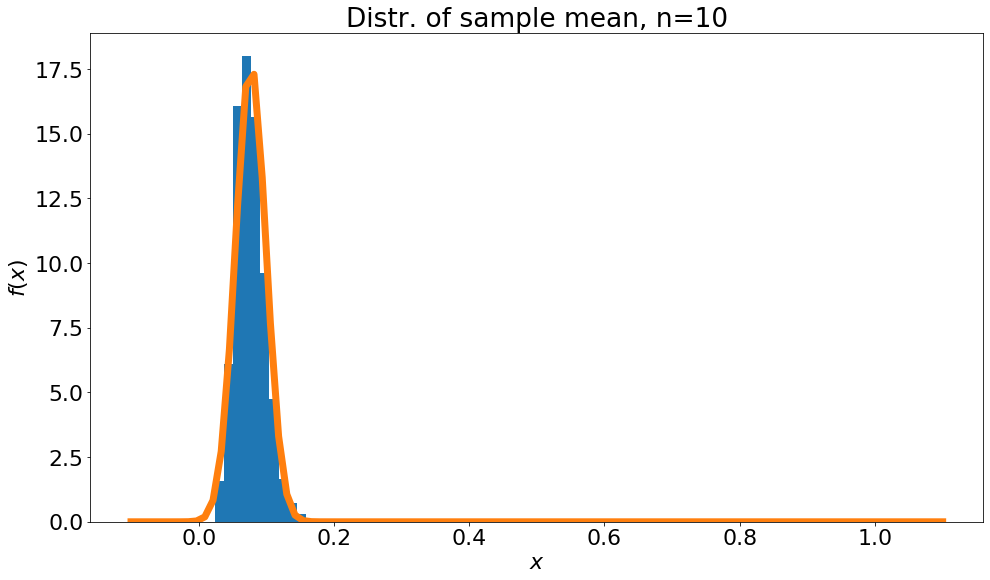

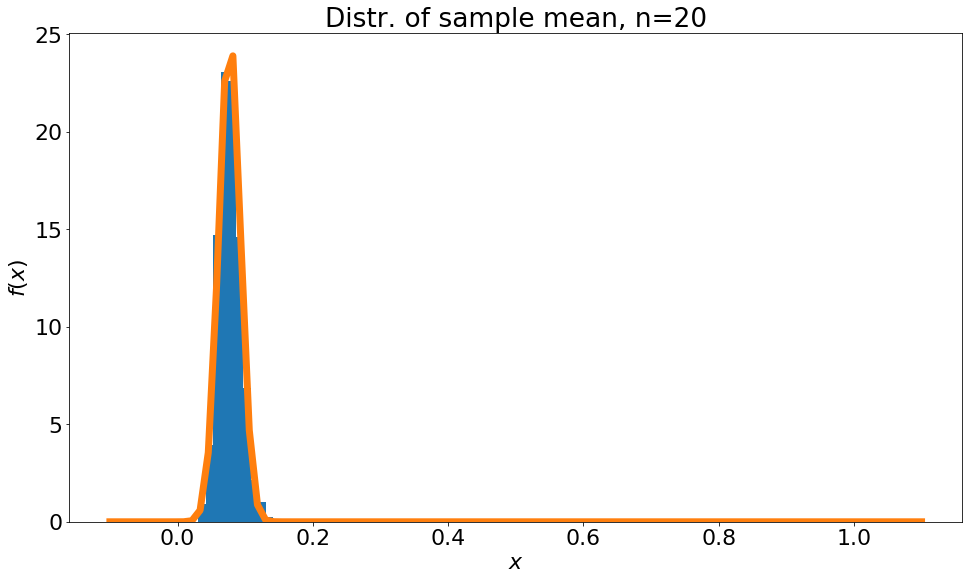

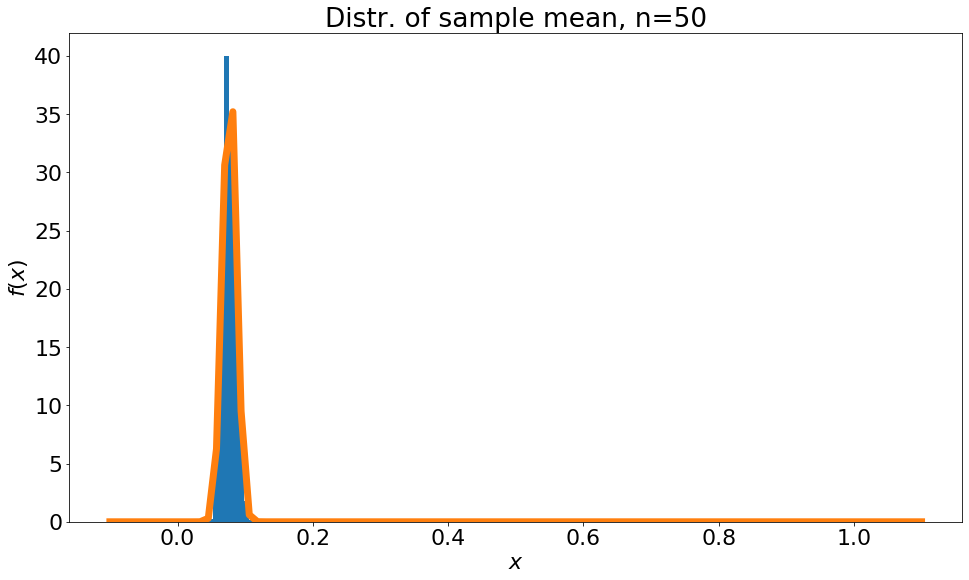

In [95]:
ns = [5, 10, 20, 50]

for i in range(len(ns)):
    plot_sample_mean_distribution(n=ns[i], ax=plt.gca())
    plt.show()

### 4. Анализ полученных результатов

Полученные результаты доказывают Центральную Предельную Теорему - распределение выборочного среднего стремится к нормальному. Чем больше размер выборки - тем лучше апроксимация нормальным распределением.